# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 67215.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 94109.47 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 114452.96 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 127934.15 examples/s]

Filter (num_proc=6):  79%|███████▉  | 88748/112120 [00:00<00:00, 116936.34 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 77107.00 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 108770.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 122300.41 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 138008.55 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142053.14 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 144786.41 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.47 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.61 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.84 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.94 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.56 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.77 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.05 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.41 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.20 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.87 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.57 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.55 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.46 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 47.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.70 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.38 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.61 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.73 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.48 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.72 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 46.14 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.94 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.25 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.29 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.40 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.96 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.64 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.03 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.01 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.92 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.16 examples/s]

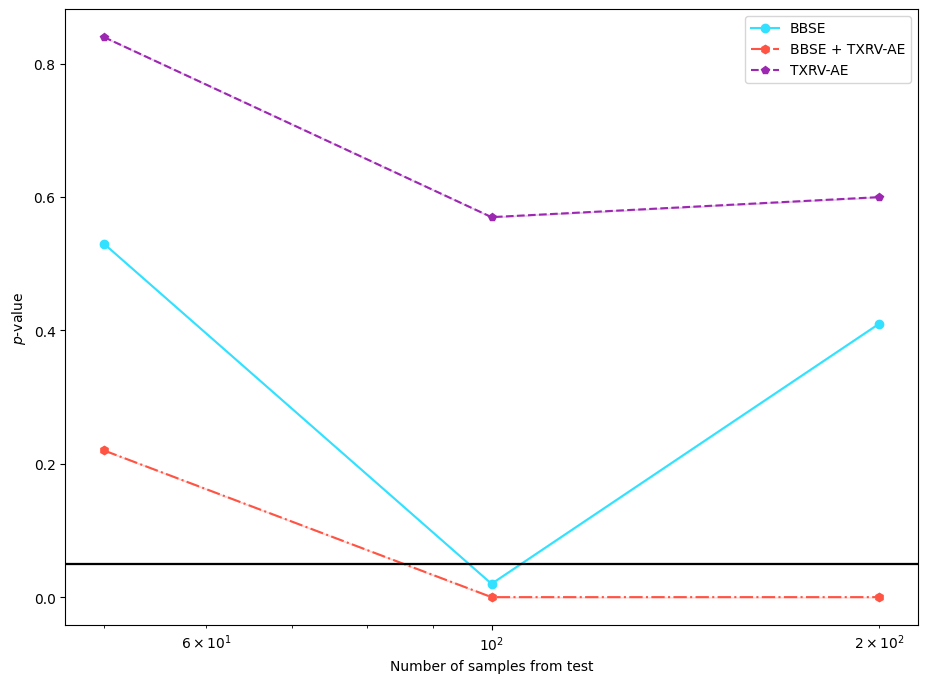

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.96 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.76 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.86 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.25 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.32 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.69 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.83 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.77 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.05 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.99 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.57 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.34 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.97 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.73 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.89 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.05 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.78 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.78 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.71 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.94 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.97 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.87 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.58 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.96 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.01 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.44 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.40 examples/s]

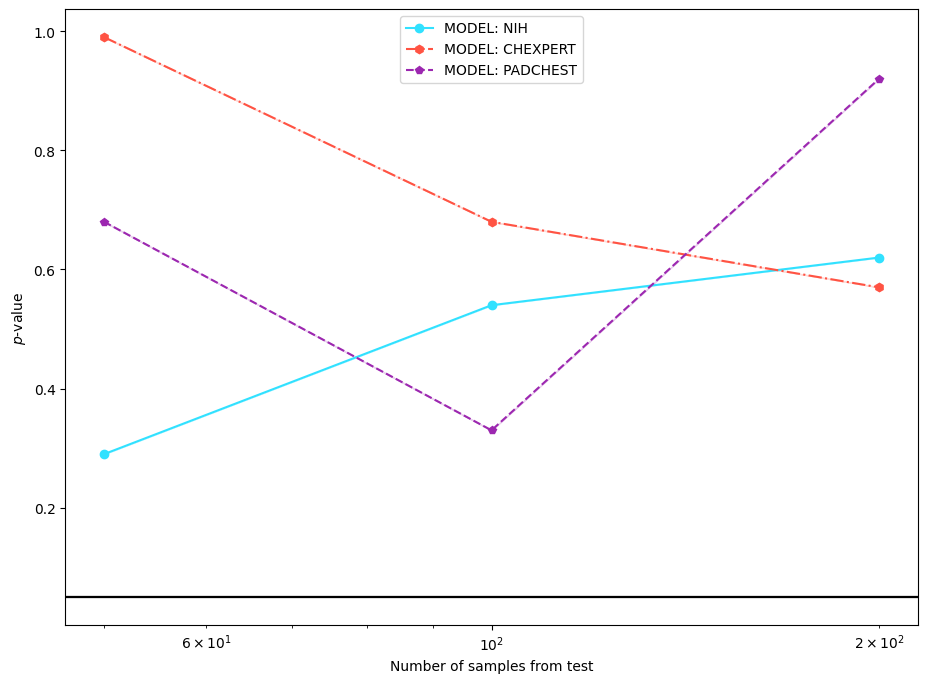

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53351.97 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77949.44 examples/s]

Filter (num_proc=6):  43%|████▎     | 48374/112120 [00:00<00:00, 71000.87 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 107768.33 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110131.55 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 114065.50 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50446.36 examples/s]

Filter (num_proc=6):  27%|██▋       | 30687/112120 [00:00<00:01, 57948.04 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 98891.10 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 106389.59 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108613.08 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111608.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.73 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.93 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 11.95 examples/s]

Map: 100%|██████████| 50/50 [00:03<00:00, 16.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.94 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.79 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.15 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.93 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.75 examples/s]

Map:  80%|████████  | 160/200 [00:05<00:01, 27.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:06<00:00, 31.39 examples/s]

Map: 100%|██████████| 200/200 [00:06<00:00, 32.53 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49245.98 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75960.05 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88251.21 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92533.28 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 106037.81 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112348.38 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48763.63 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 69069.67 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83340.36 examples/s]

Filter (num_proc=6):  63%|██████▎   | 71061/112120 [00:00<00:00, 80347.32 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102783.71 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107578.36 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.61 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.73 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.30 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.43 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.86 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:13, 12.92 examples/s]

Map:  32%|███▏      | 64/200 [00:04<00:09, 14.28 examples/s]

Map:  48%|████▊     | 96/200 [00:06<00:06, 16.58 examples/s]

Map:  64%|██████▍   | 128/200 [00:07<00:03, 20.85 examples/s]

Map:  80%|████████  | 160/200 [00:07<00:01, 24.89 examples/s]

Map:  96%|█████████▌| 192/200 [00:08<00:00, 31.20 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 32.44 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54122.01 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73667.08 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86377.06 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93462.88 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 112865.08 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 121461.22 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53013.49 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78987.70 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88640.22 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98790.18 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99903.22 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105082.32 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.58 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.83 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.06 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 18.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:04, 13.91 examples/s]

Map:  64%|██████▍   | 64/100 [00:04<00:02, 15.60 examples/s]

Map:  96%|█████████▌| 96/100 [00:06<00:00, 15.08 examples/s]

Map: 100%|██████████| 100/100 [00:06<00:00, 15.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:03<00:16, 10.24 examples/s]

Map:  32%|███▏      | 64/200 [00:04<00:09, 14.43 examples/s]

Map:  48%|████▊     | 96/200 [00:06<00:06, 16.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:06<00:03, 23.21 examples/s]

Map:  80%|████████  | 160/200 [00:07<00:01, 28.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:08<00:00, 34.88 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 35.97 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  12%|█▏        | 14000/112120 [00:00<00:02, 36986.11 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 83347.41 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 94905.44 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98648.06 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 107123.39 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112804.13 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51491.83 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70034.80 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84028.75 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98621.25 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114770.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 124092.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.11 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.91 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.64 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.87 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.16 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.43 examples/s]

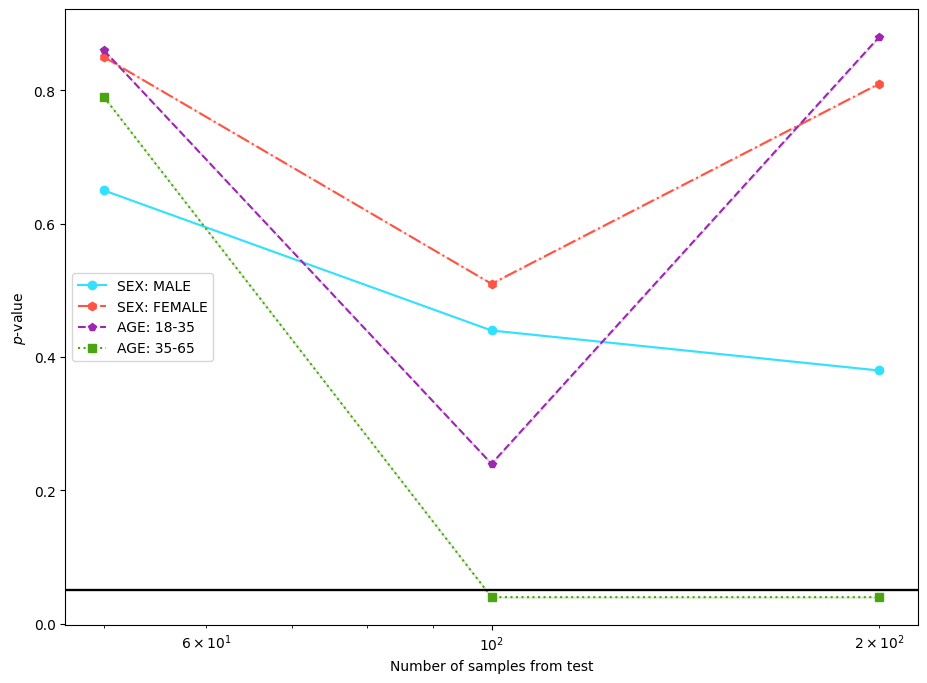

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.38 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 18.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.89 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 13.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 13.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.21 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.75 examples/s]

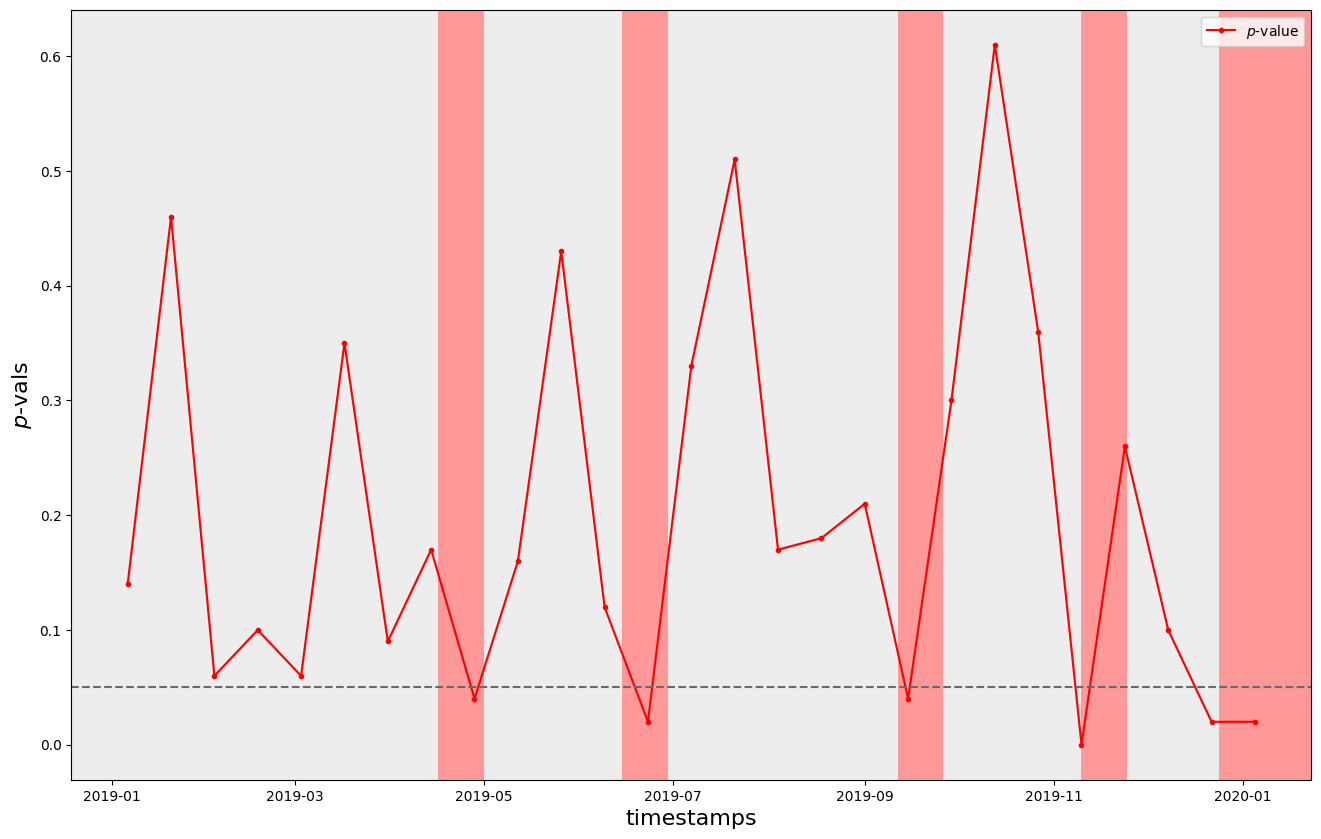

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)